<a href="https://colab.research.google.com/github/giulicrenna/data_science/blob/main/Visualizaci%C3%B3n%2BCrenna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive

drive.mount('/content/gdrive')
sns.set_theme(style="darkgrid")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
covidDataset = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/Visualizacion-Crenna.xlsx")

In [ ]:
covidDatasetRestore = covidDataset[covidDataset["edad"] < 107]
covidDataset = covidDatasetRestore
covidDataset.fecha_inicio_sintomas = pd.to_datetime(covidDataset.fecha_inicio_sintomas)
covidDataset.sample(5)

,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,sepi_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
256245,M,31.0,Años,Argentina,Santa Fe,Rosario,Formosa,NaT,2021-04-13,15,...,NaT,NO,34,Público,Caso Descartado,Descartado,82,2021-04-12,84,2022-06-05
345638,F,11.0,Años,Argentina,Buenos Aires,Vicente López,Buenos Aires,2021-04-12,2021-04-14,15,...,NaT,NO,6,Público,Caso Descartado,Descartado,6,2021-04-15,861,2022-06-05
249337,M,36.0,Años,Argentina,Buenos Aires,La Matanza,Buenos Aires,2021-04-09,2021-04-12,15,...,NaT,NO,6,Público,Caso Descartado,Descartado,6,2021-04-13,427,2022-06-05
315970,M,23.0,Años,Argentina,Buenos Aires,La Matanza,CABA,2021-04-07,2021-04-13,15,...,NaT,NO,2,Privado,Caso confirmado por laboratorio - No activo (p...,Confirmado,6,2021-04-11,427,2022-06-05
11300,M,21.0,Años,Argentina,Buenos Aires,La Plata,Buenos Aires,2021-04-04,2021-04-08,14,...,NaT,NO,6,Privado,Caso Descartado,Descartado,6,2021-04-09,441,2022-06-05


In [ ]:
covidDataset.shape

(400809, 24)

# Seaborn

**El siguiente gráfico muestra los casos por provincia** <br>
Este gráfico nos muestra sustancialmente cuales fueron las provincias con
mas casos de la Argentina.

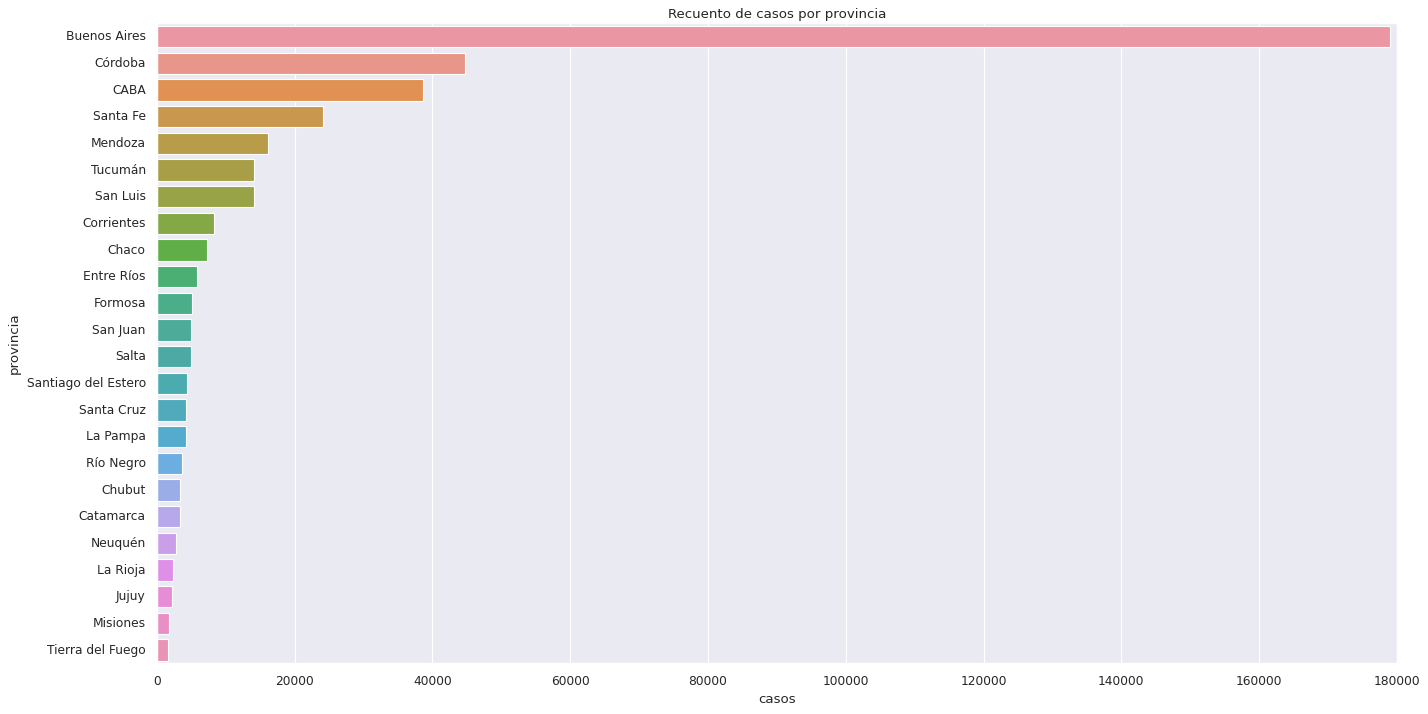

In [ ]:
provincias = covidDataset["residencia_provincia_nombre"].unique().tolist()
recuento_por_provincias = []

for prov in provincias:
  cant_casos = len(covidDataset[covidDataset["residencia_provincia_nombre"] == prov])
  recuento_por_provincias.append(cant_casos)
recuento_por_provincias

data_prov = {"provincia":provincias, "casos":recuento_por_provincias}
data_prov = pd.DataFrame(data_prov)
data_prov
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=data_prov.sort_values("casos", ascending=False), y="provincia", x="casos").set(title='Recuento de casos por provincia');


**Casos por edad agrupados por provincia** <br>
El siguiente gráfico nos muestra cual es la cantidad de casos por edad, cabe recalcar que los casos están agrupados por provincia.
Claramente podemos ver una distribución homogenea.

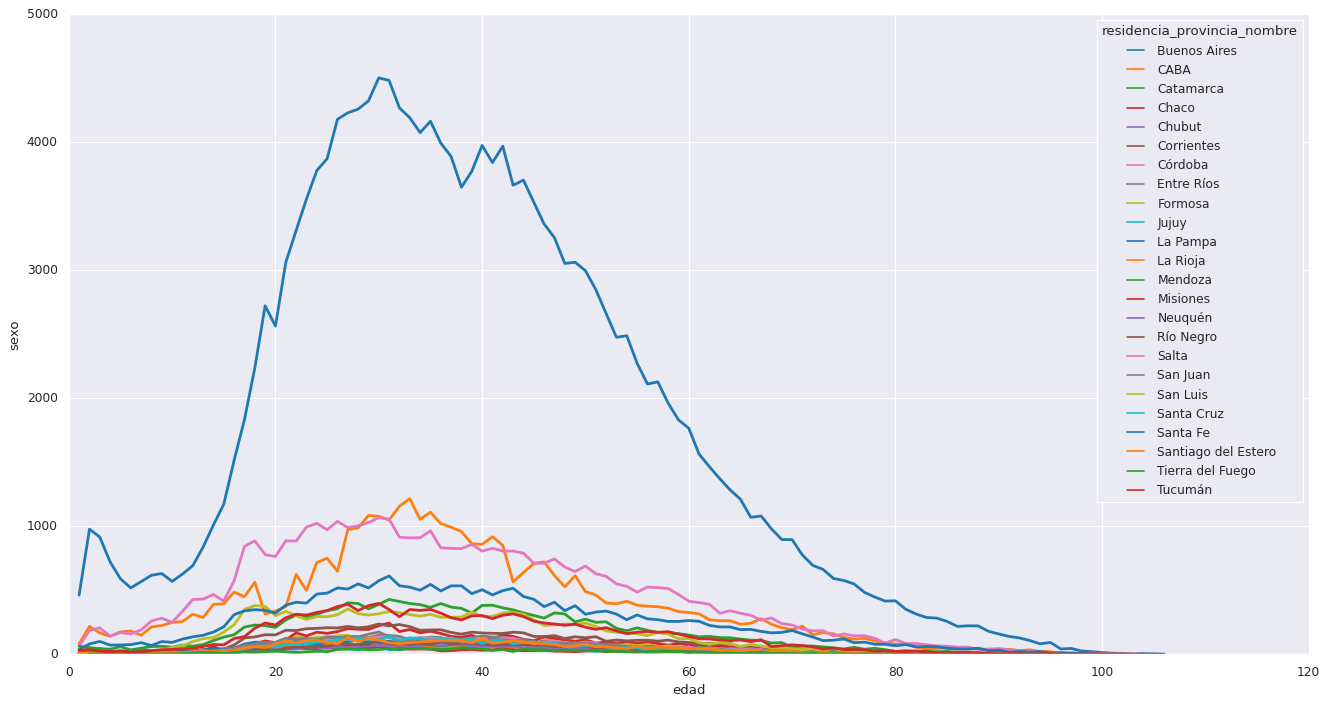

In [ ]:
grupo_edad_provincia = covidDataset.groupby(["residencia_provincia_nombre", "edad"]).count()

fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=grupo_edad_provincia, hue="residencia_provincia_nombre", y="sexo", x="edad", 
             palette="tab10", linewidth=2.5);


Este gráfico utiliza el tamaño y la altura de los círculos para determinar la cantidad de casos.

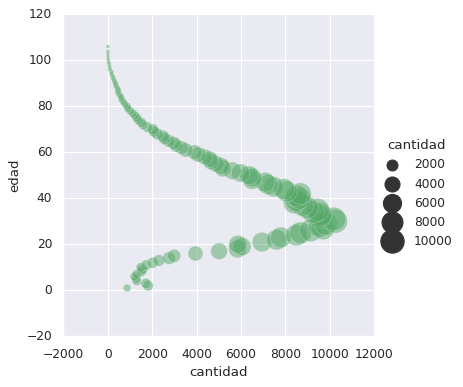

In [ ]:
grupo_edad = covidDataset.groupby("edad").count()
grupo_edad.rename(columns = {'sexo':'cantidad'}, inplace = True)
plot = sns.relplot(data=grupo_edad, y="edad", x="cantidad", size="cantidad",
            alpha=.5, palette="muted",sizes=(10, 450), color="g")

# MatplotLib
El siguiente gráfico muestra el recuento de casos por edad sin agrupaciones, solo la totalidad de casos por edad.
Al igual que antes podemos ver una distribución homogénea, casi normalizada.

In [ ]:
covidEdad = covidDataset["edad"].dropna()
covidEdad = covidEdad.astype(int).sort_values()
covidEdad = covidEdad.reindex()[covidEdad <= 107]
casosPorEdad = []
edades = [i for i in range(0, 107)]

for edad in range(0, 107):
  temporal_count = len(covidEdad[covidEdad == edad])
  casosPorEdad.append(temporal_count) 

Text(0, 0.5, 'Casos')

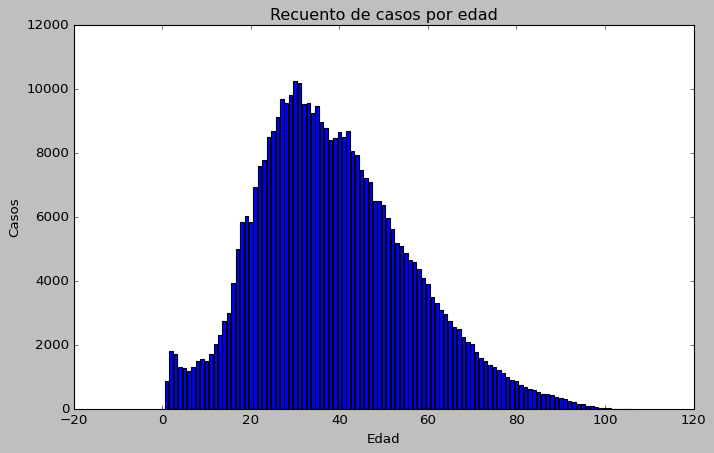

In [ ]:
mpl.style.use('classic')
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(edades, casosPorEdad)
ax.set_title("Recuento de casos por edad")
ax.set_xlabel("Edad")
ax.set_ylabel("Casos")

**El siguiente gráfico muestra el recuento de casos por sexo**<br>
Este gráfico no es muy sustancial, pero es curioso ver como los casos se distribuyen casi a la mitad entre hombres y mujeres.

Text(0.5, 1.0, 'Recuento de casos por género')

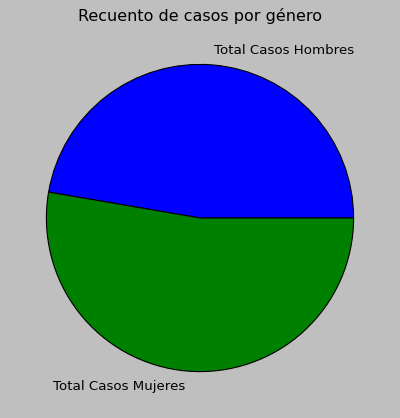

In [ ]:
recuento_masc = len(covidDataset[covidDataset["sexo"] == "M"])
recuento_fem = len(covidDataset[covidDataset["sexo"] == "F"])
rec_total = [recuento_masc, recuento_fem]
label_ = ["Total Casos Hombres", "Total Casos Mujeres"] 

mpl.style.use('classic')
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(rec_total, labels = label_)
ax.set_title("Recuento de casos por género")

**El siguiente muesta un box plot de los cuartiles de los casos**<br>
Es interesante ver que el 50% de los casos están concentrados en personas de 37 años y menos.

mean     38.744981
std      17.296696
min       1.000000
25%      26.000000
50%      37.000000
75%      50.000000
max     106.000000
Name: edad, dtype: float64


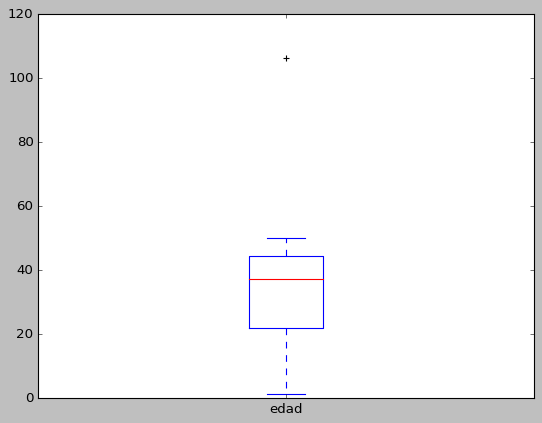

In [ ]:
quantiles = covidDataset[covidDataset["edad"] < 107].describe()["edad"].drop("count")
print(quantiles)
quantiles.plot.box();